In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.optimize import curve_fit

# Leistungsnachweis 2020

## Aufgabe 1: Self Avoiding Walk

In [3]:
# zu aufgabe 1.1.
class selfAvoidingWalker:
    def __init__(self,N_):
        self.N = N_
        self.coordinates = np.zeros((self.N,3),dtype=int)
        self.lattice = np.zeros((self.N,self.N,self.N),dtype=uint8)
        self.steps = [(1,0,0),(0,1,0),(0,0,1),(-1,0,0),(0,-1,0),(0,0,-1)]
        self.sizeSteps = len(self.steps)
        
    def createNewPath(self):
        pathCompleted = False
        counter = 0
        while( (not pathCompleted) and (counter<100) ):
            for n in range(self.N):
                if n == 0:
                    self.lattice = np.zeros((self.N,self.N,self.N),dtype=uint8)
                    self.coordinates = np.zeros((self.N,3),dtype=int)
                    self.lattice[tuple(self.coordinates[0])] = 1
                else:
                    checker = self.placeSingleWalk(n)
                    cnt = 0
                    while (not checker) and cnt < 10:
                        checker = self.placeSingleWalk(n)
                        cnt += 1
                        
                    if checker == False:
                        counter += 1
                        break
                        
                    if (checker == True) and (n == self.N-1):
                        pathCompleted = True
        if not pathCompleted:
            print("PATH not completed")
                        
    def placeSingleWalk(self,idx):
        newStep = self.steps[np.random.randint(self.sizeSteps)]
        newPos = self.coordinates[idx-1]+newStep
        if self.lattice[tuple(newPos)] == 0:
            self.coordinates[idx] = newPos
            self.lattice[tuple(newPos)] = 1
            return True
        else:
            return False
        
    def endToEndDistance(self):
        return np.linalg.norm( (self.coordinates[-1]-self.coordinates[0]) )
    
    def radiusOfGyrationSquared(self):
        centerOfMass = np.sum(self.coordinates, axis = 0)/self.coordinates.shape[0]
        return  np.sum( np.square( self.coordinates - centerOfMass ) / self.coordinates.shape[0] )

            

In [4]:
# zu aufgabe 1.2.
N_array = np.linspace(10,400,12, dtype = int)
rgResults = np.zeros((N_array.size))
reResults = np.zeros((N_array.size))
n_sample = 400

for i,myN in enumerate(N_array):
    helmut = selfAvoidingWalker(myN)
    meanre = 0
    meanrg = 0
    
    for n in range(n_sample):
        helmut.createNewPath()
        meanre += helmut.endToEndDistance()
        meanrg += np.sqrt(helmut.radiusOfGyrationSquared())
        
    reResults[i] = (meanre / n_sample)
    rgResults[i] = (meanrg / n_sample)
    print( "N = {}, Ree = {}, Rg = {}".format(myN,reResults[i],rgResults[i]))

N = 10, Ree = 3.540278878404648, Rg = 1.4982885186797654
N = 45, Ree = 8.101754247331963, Rg = 3.4630500043723664
N = 80, Ree = 10.675165837946547, Rg = 4.636008211246228
N = 116, Ree = 13.594184952540932, Rg = 5.739413491052899
N = 151, Ree = 14.77005006164046, Rg = 6.479391647660975
N = 187, Ree = 17.48656227200182, Rg = 7.499935250022886
N = 222, Ree = 19.479100718079494, Rg = 8.10685169708665
N = 258, Ree = 20.367335188179414, Rg = 8.57912349514304
N = 293, Ree = 21.72114933805079, Rg = 9.329845044833421
N = 329, Ree = 22.70581832156756, Rg = 9.638940827350677
N = 364, Ree = 24.189620186920124, Rg = 10.485828679057276
N = 400, Ree = 25.540636805252525, Rg = 10.969883496262106


<IPython.core.display.Javascript object>


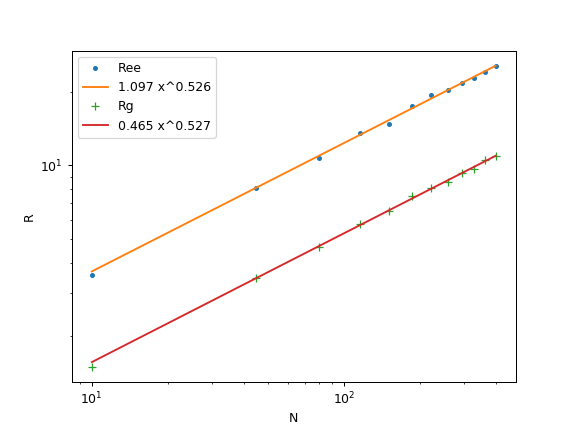

exponents compared to theory: 0.526,0.527 (0.588)
bond lengths compared to theory (Rg^2/Re^2 = 1/6 -> b_g/b_e = sqrt(1/6)): 0.465/1.097 = 0.424 (0.408)


In [5]:
def power_law(x,a,b):
    return a*x**b

a = 1.0
b = 3./5.

figure()
plot(N_array,reResults,".",label="Ree")
fit_params, covar = curve_fit(power_law, N_array, reResults)
plot(N_array,power_law(N_array,fit_params[0],fit_params[1]), label="{0:.3f} x^{1:.3f}".format(fit_params[0],fit_params[1]))
a_1 = fit_params[0]
b_1 = fit_params[1]

plot(N_array,rgResults,"+",label="Rg")
fit_params, covar = curve_fit(power_law, N_array, rgResults)
plot(N_array,power_law(N_array,fit_params[0],fit_params[1]), label="{0:.3f} x^{1:.3f}".format(fit_params[0],fit_params[1]))

a_2 = fit_params[0]
b_2 = fit_params[1]

xlabel("N")
ylabel("R")
xscale("log")
yscale("log")

legend()
show()

print("exponents compared to theory: {0:.3f},{1:.3f} ({2:.3f})".format(b_1,b_2,0.588))
print("bond lengths compared to theory (Rg^2/Re^2 = 1/6 -> b_g/b_e = sqrt(1/6)): {0:.3f}/{1:.3f} = {3:.3f} ({2:.3f})".format(a_2,a_1,np.sqrt(1/6),a_2/a_1))

In [20]:
# zu aufgabe 1.3.
def scattering(saw):
    Nqdirections = 20
    Nqlenghts = 20
    qDir = np.zeros((Nqdirections,3))
    #qvecAbs = np.linspace(2*np.pi/1,2*np.pi/(saw.N),Nqlenghts)
    qvecAbs = np.logspace(np.log10(2*np.pi/(myN)),np.log10(2*np.pi/1),num=Nqlen)
    sOfqAbs = np.zeros((Nqlenghts))
    
    # setup random directions
    for i in range(Nqdirections):
        myDir = np.random.randint(64,size=(3))
        qDir[i] = (myDir/np.linalg.norm(myDir))
    
    # loop over distances:
    for a in saw.coordinates:
        for b in saw.coordinates:
            for i,q in enumerate(qvecAbs):
                for direction in qDir:
                    sOfqAbs[i] += np.exp(-1j*np.dot(q*direction,b-a))
                    
    return np.vstack((qvecAbs,sOfqAbs/(Nqdirections*saw.N*saw.N)))

In [21]:
helmut = selfAvoidingWalker(32)
n_sample = 100
rgMean = 0
sq = np.zeros((2,20))
for i in range(n_sample):
    helmut.createNewPath()
    sq += scattering(helmut)
    rgMean += np.sqrt(helmut.radiusOfGyrationSquared())
    if i%(n_sample/10) == 0:
        print(rgMean)

rgMean /= n_sample
sq /= n_sample

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


2.3811597751935927
32.24763731945027
60.79646677953246
87.64040100081925
117.97089974235546
145.14856795930987
174.10845996574693
205.07506903000584
233.7665030950605
260.6108801891405


<IPython.core.display.Javascript object>


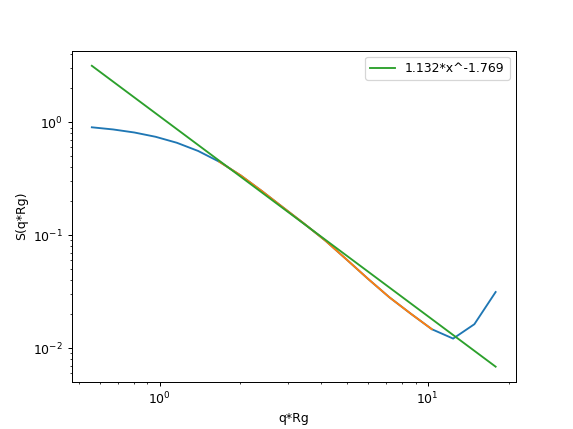

fractal dimension: -1.769, resulting power law: R~N^0.565


In [30]:
figure()
plot(sq[0,:]*rgMean,sq[1,:])
plot(sq[0,6:-3]*rgMean,sq[1,6:-3])
x = sq[0,6:-3]*rgMean
y = sq[1,6:-3]
fit_params, covar = curve_fit(power_law, x, y)
plot(sq[0,:]*rgMean,power_law(sq[0,:]*rgMean,*fit_params), label="{0:.3f}*x^{1:.3f}".format(*fit_params))
xlabel("q*Rg")
ylabel("S(q*Rg)")
xscale("log")
yscale("log")
legend()
show()

print("fractal dimension: {0:.3f}, resulting power law: R~N^{1:.3f}".format(fit_params[1],-1/fit_params[1]))

## Aufgabe 2: polymer brush

In [31]:
import bfm_simulator as bfm

<IPython.core.display.Javascript object>


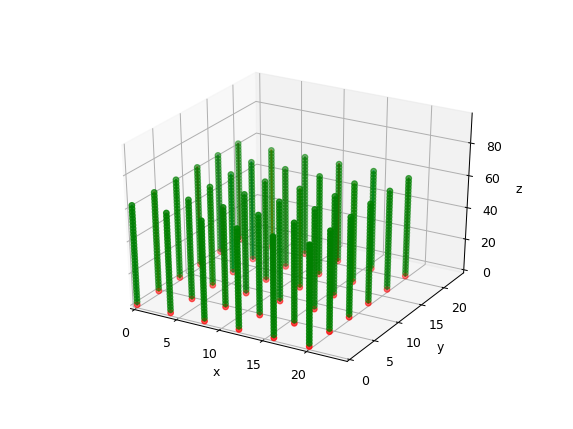

In [32]:
# grafting densities 1/9, 1/16, 1/25
sigmaInv = 16
# Kettenlängen 32, ?
N = 32
# ketten array csp = 8x8 ? -> dauert ganz schön lange... besser 6x6?
nChainsPerDirection = 6

# ab hier wird alles aus den obigen Parametern berechnet:
'''----------------------------------------------------------'''
distanceInXYDirection = int(np.sqrt(sigmaInv))
distanceInZ = 2
myBoxXY = nChainsPerDirection*distanceInXYDirection

# setup Simulator
hugo = bfm.BFMSimulator( [myBoxXY,myBoxXY,N*3], [True, True, False] )

for dx in range(nChainsPerDirection):
    for dy in range(nChainsPerDirection):
        for z in range(N):
            coords = np.array([dx*distanceInXYDirection,dy*distanceInXYDirection,z*distanceInZ])
            if (z==0):
                attr = {"fixed": True}
            else:
                attr = {"fixed": False}
            hugo.addMonomer(coords,attr)
            if not z==0:
                hugo.connectMonomers(len(hugo.molecules)-2,len(hugo.molecules)-1)
                
hugo.checkConfig()
hugo.plotConfig()

In [43]:
def createBrush(invSigma, N, nChainsPerDirection):
    
    # ketten array csp = 8x8 ? -> dauert ganz schön lange... besser 6x6?
    # nChainsPerDirection = 5

    # ab hier wird alles aus den obigen Parametern berechnet:
    '''----------------------------------------------------------'''
    distanceInXYDirection = int(np.sqrt(invSigma))
    distanceInZ = 2
    myBoxXY = nChainsPerDirection*distanceInXYDirection
    print(invSigma, distanceInXYDirection, myBoxXY)

    # setup Simulator
    hugo = bfm.BFMSimulator( [myBoxXY,myBoxXY,N*3], [True, True, False] )

    for dx in range(nChainsPerDirection):
        for dy in range(nChainsPerDirection):
            for z in range(N):
                coords = np.array([dx*distanceInXYDirection,dy*distanceInXYDirection,z*distanceInZ])
                if (z==0):
                    attr = {"fixed": True}
                else:
                    attr = {"fixed": False}
                hugo.addMonomer(coords,attr)
                if not z==0:
                    hugo.connectMonomers(len(hugo.molecules)-2,len(hugo.molecules)-1)

    hugo.checkConfig()
    return hugo

144 12 12
applied moves / attempted moves:
80040 / 320000 = 0.250125
single chain 10000 43.0 0.0 [ 8 -5 43]
single chain 11000 37.0 0.0 [ 0 -3 37]
single chain 12000 38.0 0.0 [  9 -13  38]
single chain 13000 31.0 35.666666666666664 [ 7 -4 31]
single chain 14000 30.0 32.36842105263158 [  5 -16  30]
single chain 15000 34.0 32.0 [ -3 -15  34]
single chain 16000 31.0 32.46153846153846 [ -4 -12  31]
single chain 17000 18.0 31.040816326530614 [-5 -8 18]
single chain 18000 21.0 28.949152542372882 [  1 -21  21]
single chain 19000 20.0 27.536231884057973 [ -9 -17  20]


<IPython.core.display.Javascript object>


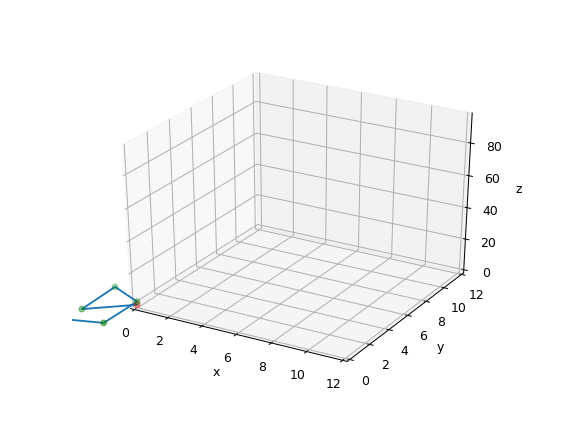

In [48]:
## Single grafted chain
chainLength = 32
n_sample = 100
t_equil = 10000
t_sample = 200


helmut = createBrush(144,chainLength,1)
helmut.performMCS(t_equil,True)

hmean = 0
counter = 0
for n in range(n_sample):
    helmut.performMCS(t_sample,False)
    sepMol = bfm.separateMolecules(helmut.molecules)
    curenth = np.sum([m[-1].coords[2] for m in sepMol]) / len(sepMol)
    if n%10 == 0:
        if counter==0:
            cnt = 1
        else:
            cnt = 1.0*counter
        print("single chain", n*100+t_equil, curenth, hmean/cnt, sepMol[0][-1].coords)

    if n > (0.2*n_sample):
        hmean+=curenth
        counter+=1
#myH[i] = hmean/counter
helmut.plotConfig()
singleChainHight = hmean/counter

9 3 15
applied moves / attempted moves:
819554 / 4800000 = 0.17074041666666667
9 0.1111111111111111 6000 57.64 0.0
9 0.1111111111111111 7000 55.72 0.0
9 0.1111111111111111 8000 54.32 0.0
9 0.1111111111111111 9000 54.8 55.11
9 0.1111111111111111 10000 54.76 54.839999999999996
9 0.1111111111111111 11000 53.92 54.72333333333333
9 0.1111111111111111 12000 54.48 54.65529411764707
9 0.1111111111111111 13000 52.88 54.61727272727274
9 0.1111111111111111 14000 52.72 54.31481481481483
9 0.1111111111111111 15000 53.28 54.185625


<IPython.core.display.Javascript object>


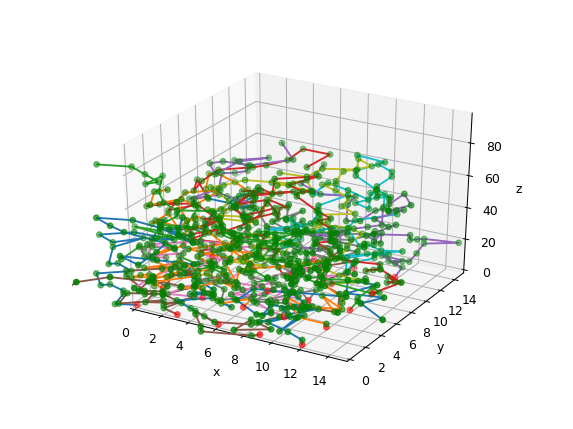

25 5 25
applied moves / attempted moves:
1136348 / 4800000 = 0.23673916666666667
25 0.04 6000 48.12 0.0
25 0.04 7000 45.28 0.0
25 0.04 8000 42.36 0.0
25 0.04 9000 39.04 39.51
25 0.04 10000 38.48 39.660000000000004
25 0.04 11000 36.88 38.94833333333334
25 0.04 12000 35.44 38.16941176470589
25 0.04 13000 37.16 37.70454545454545
25 0.04 14000 37.2 37.68444444444445
25 0.04 15000 36.52 37.593750000000014


<IPython.core.display.Javascript object>


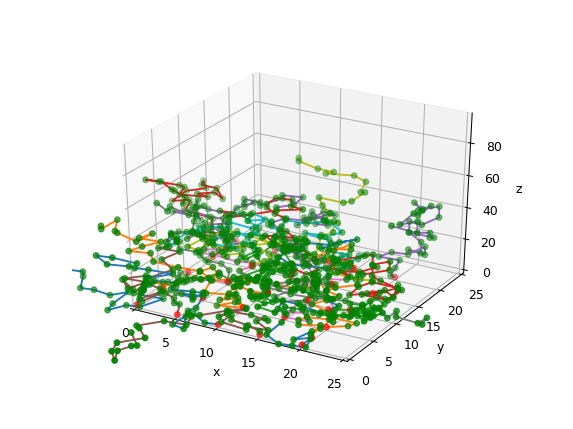

36 6 30
applied moves / attempted moves:
1155232 / 4800000 = 0.24067333333333332
36 0.027777777777777776 6000 46.4 0.0
36 0.027777777777777776 7000 43.96 0.0
36 0.027777777777777776 8000 41.28 0.0
36 0.027777777777777776 9000 39.48 40.37
36 0.027777777777777776 10000 39.76 39.61142857142856
36 0.027777777777777776 11000 38.16 39.438333333333325
36 0.027777777777777776 12000 36.68 38.668235294117636
36 0.027777777777777776 13000 35.68 38.047272727272706
36 0.027777777777777776 14000 34.36 37.5348148148148
36 0.027777777777777776 15000 31.68 36.95437499999999


<IPython.core.display.Javascript object>


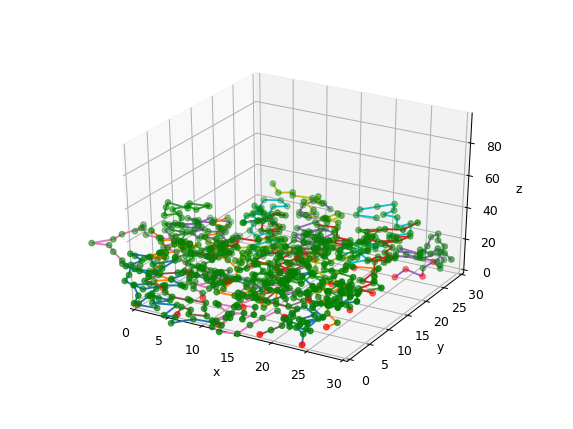

64 8 40
applied moves / attempted moves:
1173004 / 4800000 = 0.24437583333333332
64 0.015625 6000 43.08 0.0
64 0.015625 7000 39.84 0.0
64 0.015625 8000 37.8 0.0
64 0.015625 9000 35.24 35.57
64 0.015625 10000 32.8 34.65142857142857
64 0.015625 11000 30.72 33.35
64 0.015625 12000 30.04 32.64000000000001
64 0.015625 13000 30.52 32.01909090909092
64 0.015625 14000 28.64 31.61777777777778
64 0.015625 15000 28.64 31.246250000000003


<IPython.core.display.Javascript object>


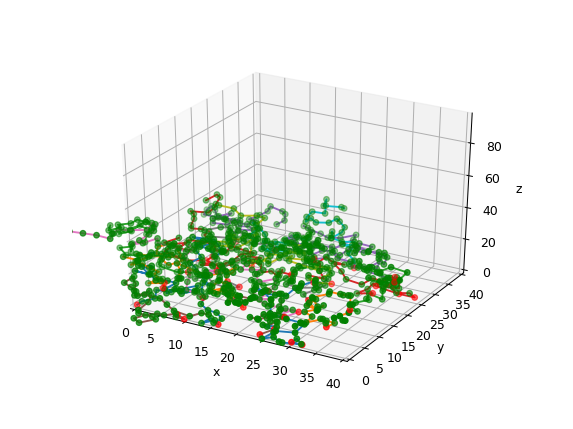

144 12 60
applied moves / attempted moves:
1182669 / 4800000 = 0.246389375
144 0.006944444444444444 6000 42.28 0.0
144 0.006944444444444444 7000 40.76 0.0
144 0.006944444444444444 8000 37.6 0.0
144 0.006944444444444444 9000 35.92 36.38
144 0.006944444444444444 10000 34.36 35.808571428571426
144 0.006944444444444444 11000 33.48 35.033333333333324
144 0.006944444444444444 12000 30.96 34.47176470588234
144 0.006944444444444444 13000 30.28 33.714545454545444
144 0.006944444444444444 14000 29.24 33.02888888888888
144 0.006944444444444444 15000 28.48 32.30874999999999


<IPython.core.display.Javascript object>


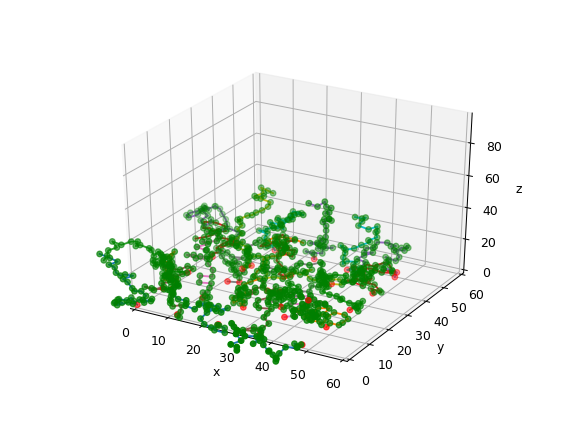

In [50]:
# brush of array 5x5
invGraftingDens = np.array([9,25,36,64,144])
chainLength = 32
n_sample = 100
myH = np.zeros((len(invGraftingDens)))
t_equil = 6000
t_sample = 200
# 5x5 ketten bilden Bürste
numChainsPerDimensions = 5

for i,sig in enumerate(invGraftingDens):
    helmut = createBrush(sig,chainLength,numChainsPerDimensions)
    helmut.performMCS(t_equil,True)
    
    hmean = 0
    counter = 0
    for n in range(n_sample):
        helmut.performMCS(t_sample,False)
        sepMol = bfm.separateMolecules(helmut.molecules)
        curenth = np.sum([m[-1].coords[-1] for m in sepMol]) / len(sepMol)
        if n%10 == 0:
            if counter==0:
                cnt = 1
            else:
                cnt = 1.0*counter
            print(sig,1/sig, n*100+t_equil, curenth, hmean/cnt)
            
        if n > (0.25*n_sample):
            hmean+=curenth
            counter+=1
    myH[i] = hmean/counter
    helmut.plotConfig()
    
data = np.vstack((invGraftingDens,myH))

<IPython.core.display.Javascript object>


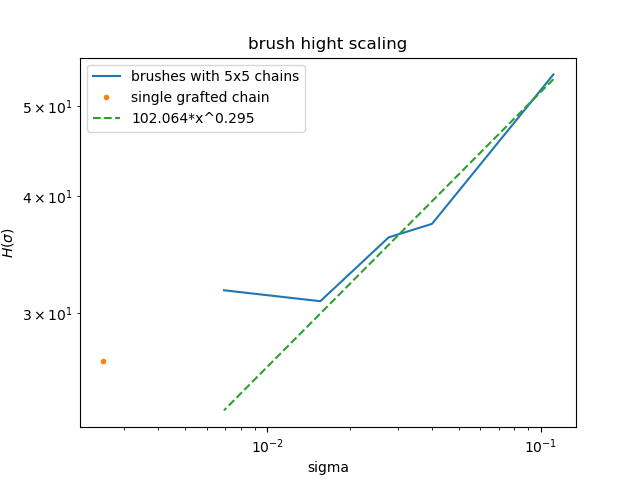

[ 9 25 36 64] [0.11111111 0.04       0.02777778 0.015625  ] [54.02918919 37.3627027  36.13837838 30.86864865]
$H~ sigma^0.33: 102.064*x^0.295$


In [63]:
figure()

plot(1/invGraftingDens,myH, label="brushes with {0}x{0} chains".format(numChainsPerDimensions))
plot(1/400, singleChainHight,".", label="single grafted chain")

fit_params, covar = curve_fit(power_law, (1/invGraftingDens)[:-1], myH[:-1])
x = np.logspace(np.log10(1/invGraftingDens[0]),np.log10(1/invGraftingDens[-1]),num=20)
plot(x,power_law(x,*fit_params),"--",label="{0:.3f}*x^{1:.3f}".format(fit_params[0],fit_params[1]))

legend()

xlabel("sigma")
ylabel(r"$H(\sigma)$")
title("brush hight scaling")
xscale("log")
yscale("log")

show()

print(invGraftingDens[:-1],(1/invGraftingDens)[:-1], myH[:-1])
print("sigma = 1/144 is already in the mushroom regime :D, so better take 1/9,1/36,1/64 for a good fit")
print(r'$H~ sigma^0.33: {0:.3f}*x^{1:.3f}$'.format(fit_params[0],fit_params[1]))